In [5]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
from urllib.request import urlopen
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import glob
from skimage import io

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\program files\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def urls_from_wnid(id):
    url = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid='
    f = urlopen(url + id)
    content = f.read()
    url_list = content.decode().split('\n')
    url_list = list(map(lambda x: x[:-1], url_list))
    return url_list

In [3]:
def download(x):
    try:
        f = urlopen(x, timeout=5)
        if f is None:
            return None
        content = f.read()
        with open('temp_image.jpeg', 'wb') as file:
            file.write(content)
            image = io.imread('temp_image.jpeg')
            return image
    except:
        return None

In [4]:
wnid = 'n03384891'
urls = urls_from_wnid(wnid)

In [5]:
image = io.imread(urls[0][:-1])

In [6]:
f = urlopen(urls[1][:-1])
content = f.read()
with open('temp_image.jpeg', 'wb') as file:
    file.write(content)

In [7]:
res = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
res2 = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

In [8]:
res.shape

(256, 256)

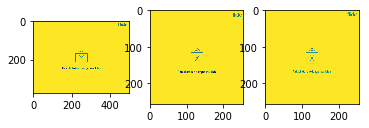

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(5, 5, 1)
plt.imshow(image)
plt.subplot(5, 5, 2)
plt.imshow(res)
plt.subplot(5, 5, 3)
plt.imshow(res2)
plt.show()

In [39]:
images = []
cur = 0
total = len(urls)
succ = 0
for url in urls:
    image = download(url[:-1])
    if image is not None and image.ndim == 3:
        image = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
        images.append(image)
        succ += 1
    cur += 1
    sys.stdout.write('\rProcessing {}/{}'.format(cur, total))

Processing 1309/1309

In [4]:
data_sets = ['n03384891', 'n04335693', 'n04350905', 'n04355115', 'n03595614']

In [5]:
images = []
cont = 0
for set_id in data_sets:
    urls = urls_from_wnid(set_id)
    for url in urls:
        image = download(url)
        if image is not None and image.ndim == 3:
            image = cv2.resize(image, dsize=(256, 256), interpolation=cv2.INTER_NEAREST)
            images.append(image)
            cont += 1
            sys.stdout.write('\rProcessing {}'.format(cont))
            

Processing 3188

In [20]:
x = np.array(images)

In [22]:
np.save(r'data/dataset.npy',x)

In [2]:
x = np.load(r'data/dataset.npy')